# 1 - Import et préparation des données

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

from datetime import date, time, datetime, timedelta
from dateutil.relativedelta import relativedelta
import locale
locale.setlocale(locale.LC_TIME,'')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose

## 1-1- Données des compteurs automatiques

### 1-1-1- Compteurs auto - mesure des passages toutes les heures

In [2]:
data_auto_1h = pd.read_csv('./data_mairie/data_velo_1h.csv',sep=';',encoding='latin-1')

In [3]:
#data_auto_1h.rename(columns = {'Time':'date', 'Avenue Schuman':'schuman', 'EDCompact Casino':'europe', 'Av des belges gauche Vélo':'belges_dir_gare', 'av des belges droite Vélo':'belges_dir_rotonde'}, inplace=True)
data_auto_1h.rename(columns = {'Time':'date', 'Avenue Schuman':'Av.Schuman', 'EDCompact Casino':'Av.Europe', 'Av des belges gauche Vélo':'Av.Belges-dir.Gare', 'av des belges droite Vélo':'Av.Belges-dir.Rotonde'}, inplace=True) 

In [4]:
#Convertir la date en format date (en modifiant les strings non reconnus sur les noms de mois)
data_auto_1h['date'] = data_auto_1h['date'].str.replace("é", "e")
data_auto_1h['date'] = data_auto_1h['date'].str.replace("janv.", "jan.")
data_auto_1h['date'] = pd.to_datetime(data_auto_1h['date'])

In [5]:
data_auto_1h.head()

,date,Av.Schuman,Av.Europe,Av.Belges-dir.Gare,Av.Belges-dir.Rotonde
0,2019-09-18 02:00:00,NaN,NaN,NaN,2.0
1,2019-09-18 11:00:00,NaN,NaN,NaN,0.0
2,2019-09-18 12:00:00,NaN,NaN,NaN,2.0
3,2019-09-18 13:00:00,NaN,NaN,NaN,29.0
4,2019-09-18 14:00:00,NaN,NaN,NaN,20.0


In [6]:
data_auto_1h = data_auto_1h.set_index('date')

### 1-1-2- Compteurs auto - mesure des passages toutes les 15mn 

In [7]:
data_auto_15mn = pd.read_csv('./data_mairie/data_velo_15mn.csv',sep=';',encoding='latin-1')

In [8]:
data_auto_15mn.rename(columns = {'Time':'date', 'Avenue Schuman':'Av.Schuman', 'EDCompact Casino':'Av.Europe', 'Av des belges gauche Vélo':'Av.Belges-dir.Gare', 'av des belges droite Vélo':'Av.Belges-dir.Rotonde'}, inplace=True)  

In [9]:
#Convertir la date en format date (en modifiant les strings non reconnus sur les noms de mois)
data_auto_15mn['date'] = data_auto_15mn['date'].str.replace("é", "e")
data_auto_15mn['date'] = data_auto_15mn['date'].str.replace("janv.", "jan.")
data_auto_15mn['date'] = pd.to_datetime(data_auto_15mn['date'])

In [10]:
data_auto_15mn = data_auto_15mn.set_index('date')

## 1-2- ADAVA : comptages des vélos pendant 1h par mois sur 16 points de la ville

In [11]:
data_a = pd.ExcelFile('./Comptage Cycliste Janvier 2020.xls')

sheet_names_data_adava = data_a.sheet_names  # see all sheet names
nb_sheets = len(sheet_names_data_adava)

In [12]:
data_adava = pd.DataFrame()

In [13]:
'''
n_sh=0
data_lieu = pd.read_excel('./Comptage Cycliste Janvier 2020.xls',sep=';',sheet_name=n_sh)

#ne garder que les lignes avant le total
len_tab = np.where(data_lieu.iloc[:,0].str.find('Total') >= 0)[0][0] #à quelle ligne est la chaine 'Total' ?
data_lieu = data_lieu.iloc[range(len_tab),:]

#renommer la variable des directions et voies
lieu = data_lieu.columns[0] #on garde le lieu stocké
data_lieu.rename(columns={data_lieu.columns[0]: 'dir_voie'}, inplace=True)

#ajouter une variable avec le nom de la rue
data_lieu.insert(0, 'lieu',lieu)

#renommer la variable type de vélo
data_lieu.rename(columns={'Unnamed: 1':'type_velo'}, inplace=True)

#ajouter les directions sur les lignes intermédiaires vides (col 1 : copier lignes impaires sur lignes paires)
data_lieu['dir_voie'].iloc[range(1,len_tab+1,2)] = data_lieu['dir_voie'].iloc[range(0,len_tab,2)].values

#supprimer les caractères \n de saut de ligne
data_lieu['dir_voie'] = data_lieu['dir_voie'].apply(lambda x: x.replace('\n',' '))

#supprimer les colonnes n'ayant que des NaN -> comptages non réalisés
data_lieu = data_lieu.dropna(axis=1, how='all')
    
data_lieu.head()
'''

"\nn_sh=0\ndata_lieu = pd.read_excel('./Comptage Cycliste Janvier 2020.xls',sep=';',sheet_name=n_sh)\n\n#ne garder que les lignes avant le total\nlen_tab = np.where(data_lieu.iloc[:,0].str.find('Total') >= 0)[0][0] #à quelle ligne est la chaine 'Total' ?\ndata_lieu = data_lieu.iloc[range(len_tab),:]\n\n#renommer la variable des directions et voies\nlieu = data_lieu.columns[0] #on garde le lieu stocké\ndata_lieu.rename(columns={data_lieu.columns[0]: 'dir_voie'}, inplace=True)\n\n#ajouter une variable avec le nom de la rue\ndata_lieu.insert(0, 'lieu',lieu)\n\n#renommer la variable type de vélo\ndata_lieu.rename(columns={'Unnamed: 1':'type_velo'}, inplace=True)\n\n#ajouter les directions sur les lignes intermédiaires vides (col 1 : copier lignes impaires sur lignes paires)\ndata_lieu['dir_voie'].iloc[range(1,len_tab+1,2)] = data_lieu['dir_voie'].iloc[range(0,len_tab,2)].values\n\n#supprimer les caractères \n de saut de ligne\ndata_lieu['dir_voie'] = data_lieu['dir_voie'].apply(lambda x: x

In [14]:
for n_sh in range(nb_sheets):
    
    #CHARGER DATA DU LIEU (FEUILLE n_sh)
    data_lieu = pd.read_excel('./Comptage Cycliste Janvier 2020.xls',sep=';',sheet_name=n_sh)
    
    #DATA PREP
    #ne garder que les lignes avant le total
    len_tab = np.where(data_lieu.iloc[:,0].str.find('Total') >= 0)[0][0] #à quelle ligne est la chaine 'Total' ?
    data_lieu = data_lieu.iloc[range(len_tab),:]

    #renommer la variable des directions et voies
    lieu = data_lieu.columns[0] #on garde le lieu stocké
    data_lieu.rename(columns={data_lieu.columns[0]: 'dir_voie'}, inplace=True)

    #ajouter une variable avec le nom de la rue
    data_lieu.insert(0, 'lieu',lieu)

    #renommer la variable type de vélo
    data_lieu.rename(columns={'Unnamed: 1':'type_velo'}, inplace=True)

    #ajouter les directions sur les lignes intermédiaires vides (col 1 : copier lignes impaires sur lignes paires)
    data_lieu['dir_voie'].iloc[range(1,len_tab+1,2)] = data_lieu['dir_voie'].iloc[range(0,len_tab,2)].values

    #supprimer les caractères \n de saut de ligne
    data_lieu['dir_voie'] = data_lieu['dir_voie'].apply(lambda x: x.replace('\n',' '))

    #supprimer les colonnes n'ayant que des NaN -> comptages non réalisés
    data_lieu = data_lieu.dropna(axis=1, how='all')

    #remplacer les NaN restant par des 0 -> comptages réalisés mais 0 vélos de ce groupe
    data_lieu = data_lieu.fillna(0)

    #passer les dates en observations (réorganisation de la dataframe)
    data_lieu = data_lieu.melt(id_vars = ['lieu','dir_voie','type_velo'])

    #renommer les variables de date et nombre de vélo
    data_lieu.rename(columns={'variable':'date','value':'nombre'},inplace=True)
    
    #convertir les nombres de vélos en entiers
    data_lieu['nombre'] = data_lieu['nombre'].astype(int)
    
    #AJOUTER A data_adava
    data_adava = data_adava.append(data_lieu)

C:\Users\elise\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
data_adava.describe(include='all')

,lieu,dir_voie,type_velo,date,nombre
count,4220,4220,4220,4220,4220.000000
unique,16,46,2,42,NaN
top,Avenues Malacrida - Mauriat - Infirmeries,Cyclistes venant du Centre-Ville,Vélos,2019-12-01 00:00:00,NaN
freq,512,290,2110,120,NaN
first,NaN,NaN,NaN,2016-05-01 00:00:00,NaN
last,NaN,NaN,NaN,2020-01-01 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,5.312559
std,NaN,NaN,NaN,NaN,7.123911
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000


In [16]:
data_adava.to_csv('./data_adava_prep.csv',index=False,sep=';')

# 2 - Graphs comptages ADAVA

In [17]:
data_adava = pd.read_csv('./data_adava_prep.csv',sep=';')

In [18]:
#convertir les dates en format date
data_adava['date'] = pd.to_datetime(data_adava['date'])

In [19]:
#enlever les données de juillet et août 
juil_aout = (pd.DatetimeIndex(data_adava['date']).month == 7)|(pd.DatetimeIndex(data_adava['date']).month == 8)
data_adava = data_adava[~juil_aout]

In [20]:
#enlever les données de mai et juin 2016 où il y a pas mal de points de comptages manquants
year_month = pd.to_datetime(data_adava['date']).dt.to_period('M')
mai_juin_16 = (year_month=='2016-05')| (year_month=='2016-06')
data_adava = data_adava[~mai_juin_16]

In [21]:
#paramètres constants
base_titre = "Comptages de vélos de septembre 2016 à janvier 2020"

## 2-1- Nombre total de vélos recencés

In [22]:
data_by_month = data_adava.groupby(['date'],as_index=False).sum()
ts_by_month = data_by_month.set_index('date')

In [23]:
#limites des années
lim_annees = ts_by_month.index[ts_by_month.index.month == 1]

### 2-1-1- Evolution globale

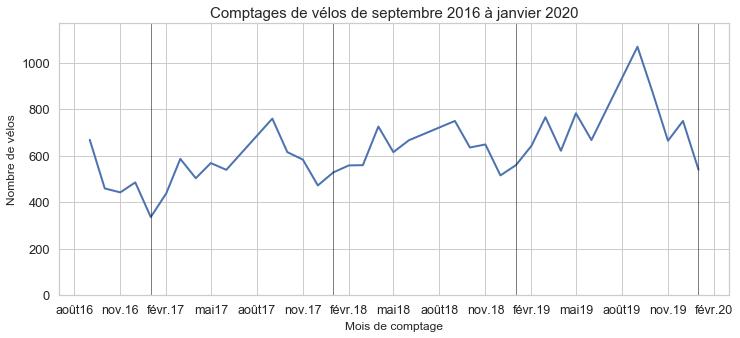

In [24]:
plt.figure(figsize=(12,5))
g_by_month = sns.lineplot(x=ts_by_month.index, y='nombre', data=ts_by_month, linewidth=2)

g_by_month.set(xlabel='Mois de comptage', ylabel='Nombre de vélos')
plt.xticks(fontsize=12.5),plt.yticks(fontsize=13)
g_by_month.axes.set_title(base_titre,fontsize=15)

g_by_month.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
g_by_month.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))
plt.ylim(0, ts_by_month.nombre.max()+100)

for an in lim_annees: 
    plt.axvline(an, linewidth=0.5, color="black")


### 2-1-2- Décomposition de la série temporelle

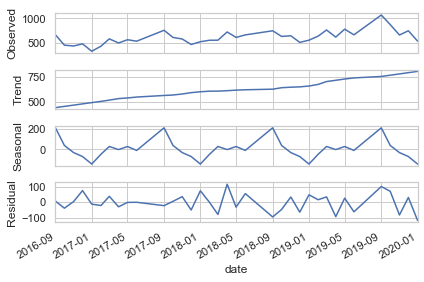

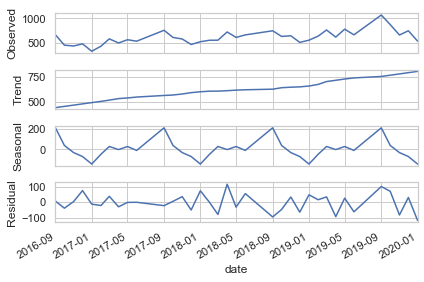

In [25]:
ts_by_month_decompose = seasonal_decompose(ts_by_month, model='additive',freq=10,extrapolate_trend=1)
ts_by_month_decompose.plot()

### 2-1-3- Tendance de l'évolution des comptages

In [26]:
#extraire les 1ère et dernière valeurs de la trend pour les afficher sur le graph
trend1 = ts_by_month_decompose.trend[~np.isnan(ts_by_month_decompose.trend)['nombre']].iloc[0]
trend_der = ts_by_month_decompose.trend[~np.isnan(ts_by_month_decompose.trend)['nombre']].iloc[-1]

In [27]:
#croissance de la tendance
perc_croissance = str(int(round((trend_der.nombre - trend1.nombre)/trend1.nombre*100)))

Text(2020-01-01 00:00:00, 250, '+ 80% de sept.16 à janv.20')

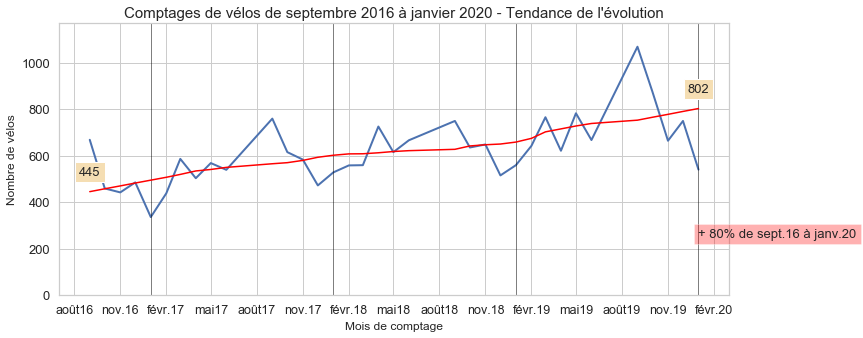

In [28]:
plt.figure(figsize=(12,5))
g_by_month = sns.lineplot(x=ts_by_month.index, y='nombre', data=ts_by_month, linewidth=2)

g_by_month.set(xlabel='Mois de comptage', ylabel='Nombre de vélos')
plt.xticks(fontsize=12.5),plt.yticks(fontsize=13)
g_by_month.axes.set_title(base_titre+" - Tendance de l'évolution",fontsize=15)

g_by_month.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
g_by_month.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))
plt.ylim(0, ts_by_month.nombre.max()+100)

for an in lim_annees: 
    plt.axvline(an, linewidth=0.5, color="black")
    
plt.plot(ts_by_month_decompose.trend,color="red")

g_by_month.text(trend1.name, trend1.nombre+70,int(round(trend1.nombre)), fontsize=13,horizontalalignment='center', bbox=dict(facecolor='wheat'))
g_by_month.text(trend_der.name, trend_der.nombre+70,int(round(trend_der.nombre)), fontsize=13,horizontalalignment='center', bbox=dict(facecolor='wheat'))
g_by_month.text(trend_der.name,250,'+ '+perc_croissance+"% de sept.16 à janv.20", fontsize=13, bbox=dict(facecolor='red',alpha=0.3))


Sur ce graphique, la ligne grise correspond à la courbe des données réelles.

La ligne rouge correspond à la tendance, en enlevant la part liée à la saisonnalité (en réalisant une moyenne glissante sur 12 mois). Cette courbe est en hausse sur la période étudiée (de 445 vélos en septembre 2016 à 802 vélos en janvier 2020, soit +80%).

On peut donc en déduire qu’en dehors de l’effet « période de l’année », le nombre de vélos comptés connait une forte croissance. 
Attention cependant, cela peut être lié à l’augmentation du nombre de points de mesure.

La moyenne par lieu de comptage permet d’annuler l’effet du nombre de lieux mesurés (cela montre l’évolution du nombre de vélos recensés à nombre égal de rues étudiées).

## 2-2- Nombre moyen de vélos par comptage

### 2-2-1- Evolution et tendance

In [29]:
# série temporelle du nombre de vélo moyen (par lieu) compté par mois
data_by_month_tot_velos = data_adava.groupby(['date','lieu'],as_index=False).sum()
data_by_month_mean = data_by_month_tot_velos.groupby(['date'],as_index=False).mean()
ts_by_month_mean = data_by_month_mean.set_index('date')

#décomposition de la série temporelle
ts_by_month_mean_decompose = seasonal_decompose(ts_by_month_mean, model='additive',freq=10,extrapolate_trend=1)

#extraire les 1ère et dernière valeurs de la trend pour les afficher sur le graph
trend1 = ts_by_month_mean_decompose.trend[~np.isnan(ts_by_month_mean_decompose.trend)['nombre']].iloc[0]
trend_der = ts_by_month_mean_decompose.trend[~np.isnan(ts_by_month_mean_decompose.trend)['nombre']].iloc[-1]

#croissance de la tendance
perc_croissance = str(int(round((trend_der.nombre - trend1.nombre)/trend1.nombre*100)))

Text(2020-01-01 00:00:00, 20, '+ 63% de sept.16 à janv.20')

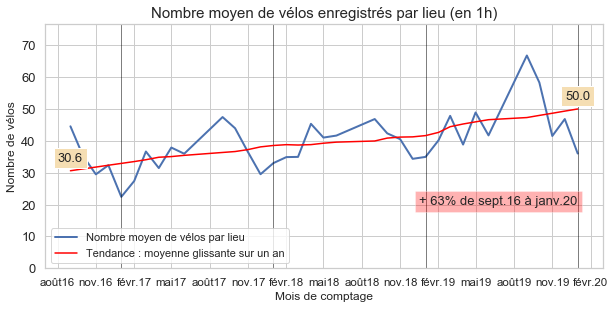

In [229]:
plt.figure(figsize=(10,4.5))

g_by_month_mean = sns.lineplot(x=ts_by_month_mean.index, y='nombre', data=ts_by_month_mean, linewidth=2,
                               label="Nombre moyen de vélos par lieu")

g_by_month_mean.set(xlabel='Mois de comptage', ylabel='Nombre de vélos')
plt.xticks(fontsize=11.5),plt.yticks(fontsize=13)
g_by_month_mean.axes.set_title("Nombre moyen de vélos enregistrés par lieu (en 1h)",fontsize=15)

g_by_month_mean.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
g_by_month_mean.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))
plt.ylim(0, ts_by_month_mean.nombre.max()+10)

for an in lim_annees: 
    plt.axvline(an, linewidth=0.5, color="black")
    
plt.plot(ts_by_month_mean_decompose.trend,color="red", label='Tendance : moyenne glissante sur un an')
plt.legend(loc='lower left')

g_by_month_mean.text(trend1.name, trend1.nombre+3,round(trend1.nombre,1), fontsize=13,horizontalalignment='center', bbox=dict(facecolor='wheat'))
g_by_month_mean.text(trend_der.name, trend_der.nombre+3,round(trend_der.nombre,1), fontsize=13,horizontalalignment='center', bbox=dict(facecolor='wheat'))
g_by_month_mean.text(trend_der.name,20,'+ '+perc_croissance+"% de sept.16 à janv.20", fontsize=13,horizontalalignment='right', bbox=dict(facecolor='red',alpha=0.3))


La ligne grise correspond à la courbe des données réelles et la ligne rouge à la tendance, hors saisonnalité. 

La tendance est là encore en hausse sur la période étudiée, de 30,6 vélos/lieu en septembre 2016 à 50 en janvier 2020, soit +63%.

La hausse est ainsi légèrement moins forte en enlevant l’effet « nombre de lieux de comptage », mais la tendance du nombre de vélos comptés est tout de même toujours en hausse.

### 2-2-2- Saisonnalité

In [31]:
ts_saisonnalite = ts_by_month_mean_decompose.seasonal + ts_by_month_mean.mean()

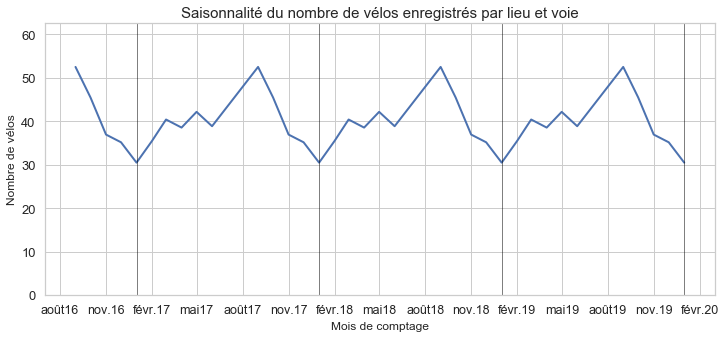

In [32]:
plt.figure(figsize=(12,5))
g_by_month_mean_sais = sns.lineplot(x=ts_saisonnalite.index, y='nombre', data=ts_saisonnalite, linewidth=2)

g_by_month_mean_sais.set(xlabel='Mois de comptage', ylabel='Nombre de vélos')
plt.xticks(fontsize=12.5),plt.yticks(fontsize=13)
g_by_month_mean_sais.axes.set_title("Saisonnalité du nombre de vélos enregistrés par lieu et voie",fontsize=15)

g_by_month_mean_sais.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
g_by_month_mean_sais.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))
plt.ylim(0, ts_saisonnalite.nombre.max()+10)

for an in lim_annees: 
    plt.axvline(an, linewidth=0.5, color="black")

In [33]:
saisonnalite = ts_by_month_mean_decompose.seasonal.iloc[4:14]
saisonnalite.set_index([['Janvier','Février','Mars','Avril','Mai','Juin','Septembre','Octobre','Novembre','Décembre']],inplace=True)

Text(5.5, -2.7, 'Pas de comptages \nen juillet/août')

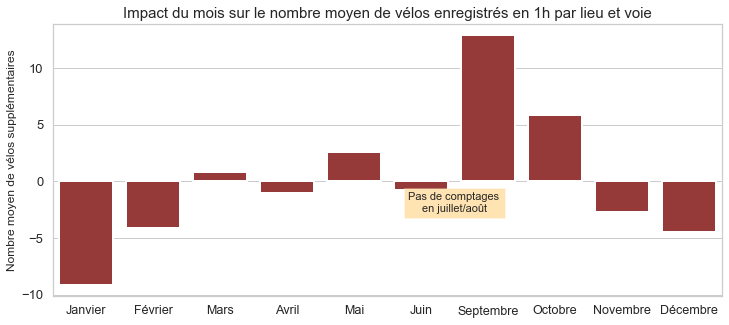

In [34]:
plt.figure(figsize=(12,5))
g_by_month_mean_season = sns.barplot(x=saisonnalite.index, y='nombre', data=saisonnalite, linewidth=2,color='brown')

g_by_month_mean_season.set(xlabel='', ylabel='Nombre moyen de vélos supplémentaires')
plt.xticks(fontsize=12.5),plt.yticks(fontsize=13)
g_by_month_mean_season.axes.set_title("Impact du mois sur le nombre moyen de vélos enregistrés en 1h par lieu et voie",fontsize=15)

plt.ylim(saisonnalite.nombre.min()-1, saisonnalite.nombre.max()+1)

g_by_month_mean_season.text(5.5,-2.7,'Pas de comptages \nen juillet/août',fontsize=11,horizontalalignment='center', bbox=dict(facecolor='orange',alpha=0.3))

In [35]:
#en ajoutant le nombre de vélos moyens qui passent
saisonnalite_val = saisonnalite + ts_by_month_mean.mean()

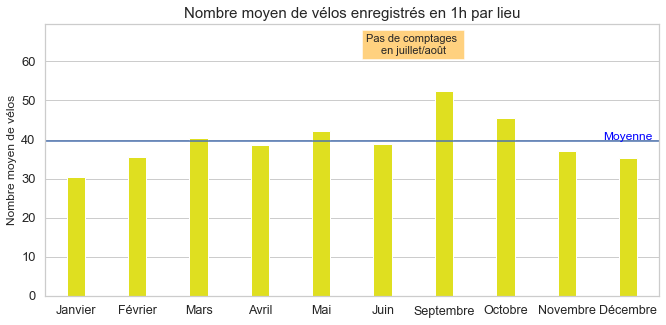

In [36]:
plt.figure(figsize=(11,5))
 
g_by_month_mean_season_val = sns.barplot(x=saisonnalite_val.index,y='nombre',data=saisonnalite_val,color='yellow')

g_by_month_mean_season_val.set(xlabel='', ylabel='Nombre moyen de vélos')
plt.xticks(fontsize=12.5),plt.yticks(fontsize=13)
g_by_month_mean_season_val.axes.set_title("Nombre moyen de vélos enregistrés en 1h par lieu",fontsize=15)

plt.ylim(0, saisonnalite_val.nombre.max()+17)

g_by_month_mean_season_val.text(5.5,62,'Pas de comptages \nen juillet/août',fontsize=11,horizontalalignment='center', bbox=dict(facecolor='orange',alpha=0.5))

g_by_month_mean_season_val.axhline(ts_by_month_mean.mean().nombre)#, ls='--')
g_by_month_mean_season_val.text(9,ts_by_month_mean.mean()+0.3,'Moyenne',fontsize=12,horizontalalignment='center', color='blue')

#pour changer la largeur des barres
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value) # we change the bar width
        patch.set_x(patch.get_x() + diff * .5) # we recenter the bar

change_width(g_by_month_mean_season_val, 0.3)

## 2-3- Nombre de vélos recensés par type de vélo

In [37]:
# série temporelle du nombre de vélo moyen (par lieu et type de vélo) compté par mois
data_by_month_tot_velos_type = data_adava.groupby(['date','lieu','type_velo'],as_index=False).sum()
data_by_month_type_mean = data_by_month_tot_velos_type.groupby(['date','type_velo'],as_index=False).mean()
ts_by_month_type_mean = data_by_month_type_mean.set_index('date')

#décomposition de la série temporelle
ts_by_month_type_mean_p = ts_by_month_type_mean.pivot(columns='type_velo', values='nombre')
ts_by_month_type_mean_decompose = seasonal_decompose(ts_by_month_type_mean_p, model='additive',freq=10,extrapolate_trend=1)

#extraire les 1ère et dernière valeurs de la trend 
trend1_vae = ts_by_month_type_mean_decompose.trend['VAE'][~np.isnan(ts_by_month_type_mean_decompose.trend['VAE'])].iloc[0]
trend_der_vae = ts_by_month_type_mean_decompose.trend['VAE'][~np.isnan(ts_by_month_type_mean_decompose.trend['VAE'])].iloc[-1]
trend1_velo = ts_by_month_type_mean_decompose.trend['Vélos'][~np.isnan(ts_by_month_type_mean_decompose.trend['Vélos'])].iloc[0]
trend_der_velo = ts_by_month_type_mean_decompose.trend['Vélos'][~np.isnan(ts_by_month_type_mean_decompose.trend['Vélos'])].iloc[-1]
trend_date_avder = ts_by_month_type_mean_decompose.trend['Vélos'][~np.isnan(ts_by_month_type_mean_decompose.trend['Vélos'])].index[-3]

#croissance de la tendance
perc_croissance_vae = str(int(round((trend_der_vae - trend1_vae)/trend1_vae*100)))
perc_croissance_velo = str(int(round((trend_der_velo - trend1_velo)/trend1_velo*100)))

Text(2019-11-01 00:00:00, 12.403958333333346, '+ 321% de VAE')

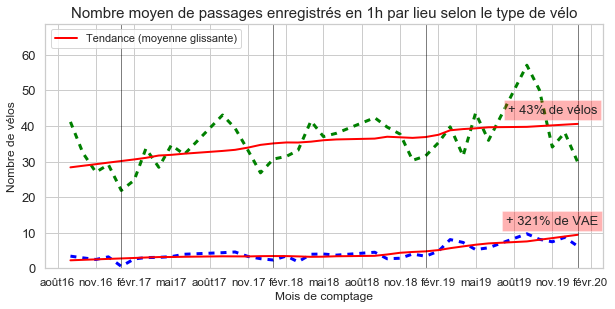

In [226]:
plt.figure(figsize=(10,4.5))
g_by_month_type_mean = sns.lineplot(x=ts_by_month_type_mean.index, y='nombre', data=ts_by_month_type_mean, hue='type_velo', 
                                    linewidth=3,style='type_velo',dashes=[(2, 2), (2, 2)],legend=False, palette=["blue","green"])

plt.plot(ts_by_month_type_mean_decompose.trend['Vélos'],color="red",linewidth=2,label="Tendance (moyenne glissante)")
plt.plot(ts_by_month_type_mean_decompose.trend['VAE'],color="red",linewidth=2)

plt.legend()

g_by_month_type_mean.set(xlabel='Mois de comptage', ylabel='Nombre de vélos')
plt.xticks(fontsize=11.5),plt.yticks(fontsize=13)
g_by_month_type_mean.axes.set_title("Nombre moyen de passages enregistrés en 1h par lieu selon le type de vélo",fontsize=15)

g_by_month_type_mean.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
g_by_month_type_mean.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))
plt.ylim(0, ts_by_month_mean.nombre.max()+2)

for an in lim_annees: 
    plt.axvline(an, linewidth=0.5, color="black")
    
g_by_month_type_mean.text(trend_date_avder,trend_der_velo+3,'+ '+perc_croissance_velo+"% de vélos", fontsize=13,horizontalalignment='center', bbox=dict(facecolor='red',alpha=0.3))
g_by_month_type_mean.text(trend_date_avder,trend_der_vae+3,'+ '+perc_croissance_vae+"% de VAE", fontsize=13,horizontalalignment='center', bbox=dict(facecolor='red',alpha=0.3))

    

## 2-4- Nombre de vélos recensés par lieu

In [165]:
# série temporelle du nombre de vélo (par lieu) compté par mois
data_by_month_lieu = data_adava.groupby(['date','lieu'],as_index=False).sum()
ts_by_month_lieu = data_by_month_lieu.set_index('date')

ts_by_month_lieu_p = ts_by_month_lieu.pivot(columns='lieu', values='nombre')


In [166]:
#changer l'ordre des lieux pour commencer par les 4 pour la prez de l'ADAVA
ts_by_month_lieu_p = ts_by_month_lieu_p[['Avenue Gambetta', 'Avenue des Belges','Cours Mirabeau','Avenue du Club Hippique',
                                           'Avenue Gaston Berger', 'Avenue Victor Hugo', 'Avenue de l\'Europe', 'Avenue de la République', 
                                            'Avenues Malacrida - Mauriat - Infirmeries','Avenues Pagnol - Europe', 'Avenues Schumann -Churchill',
                                           'Boulevard des Poilus', 'Carrefour d\'Orbitelle', 'Cours des Arts et Métiers - Nostradamus',
                                           'Place Bellegarde (rue Mignet)', 'Pont de l\'Arc']]
                                           

In [167]:
#imputation des données manquantes
#choix : calculer la moyenne annuelle (+/- 6 mois) sur ce lieu et ajouter la composante saisonnière calculée plus haut (saisonnalite)
ts_by_month_lieu_imp = ts_by_month_lieu_p

for lieu1 in ts_by_month_lieu_p.columns:
    for date1 in ts_by_month_lieu_p.index:
        if np.isnan(ts_by_month_lieu_p.loc[date1,lieu1]):
            moy_an_lieu = ts_by_month_lieu_p.loc[(date1-relativedelta(months=7)):(date1+relativedelta(months=7)),lieu1].mean()
            sais_mois = ts_by_month_mean_decompose.seasonal.loc[date1]
            ts_by_month_lieu_imp.loc[date1,lieu1] = round(moy_an_lieu + sais_mois,3).nombre

In [168]:
#décomposition de la série temporelle
ts_by_month_lieu_decompose = seasonal_decompose(ts_by_month_lieu_imp, model='additive',freq=10,extrapolate_trend=1)

In [169]:
liste_lieux = ts_by_month_lieu_decompose.trend.columns

In [170]:
#calcul des croissances de la tendance
list_perc_croissance = []

#date de la dernière trend dispo
trend_date_der = ts_by_month_lieu_decompose.trend[~np.isnan(ts_by_month_lieu_decompose.trend.iloc[:,0])].index[-1]

for lieu_l in liste_lieux:
    #première et dernière données de la trend
    trend1_l = ts_by_month_lieu_decompose.trend[lieu_l][~np.isnan(ts_by_month_lieu_decompose.trend[lieu_l])].iloc[0]
    trend_der_l = ts_by_month_lieu_decompose.trend[lieu_l][~np.isnan(ts_by_month_lieu_decompose.trend[lieu_l])].iloc[-1]
    
    #% de croissance
    perc_croissance_l = str(int(round((trend_der_l - trend1_l)/trend1_l*100)))
    list_perc_croissance.append(perc_croissance_l)
    

Text(0.5, 0.98, 'Nombre moyen de vélos enregistrés par comptage, par lieu')

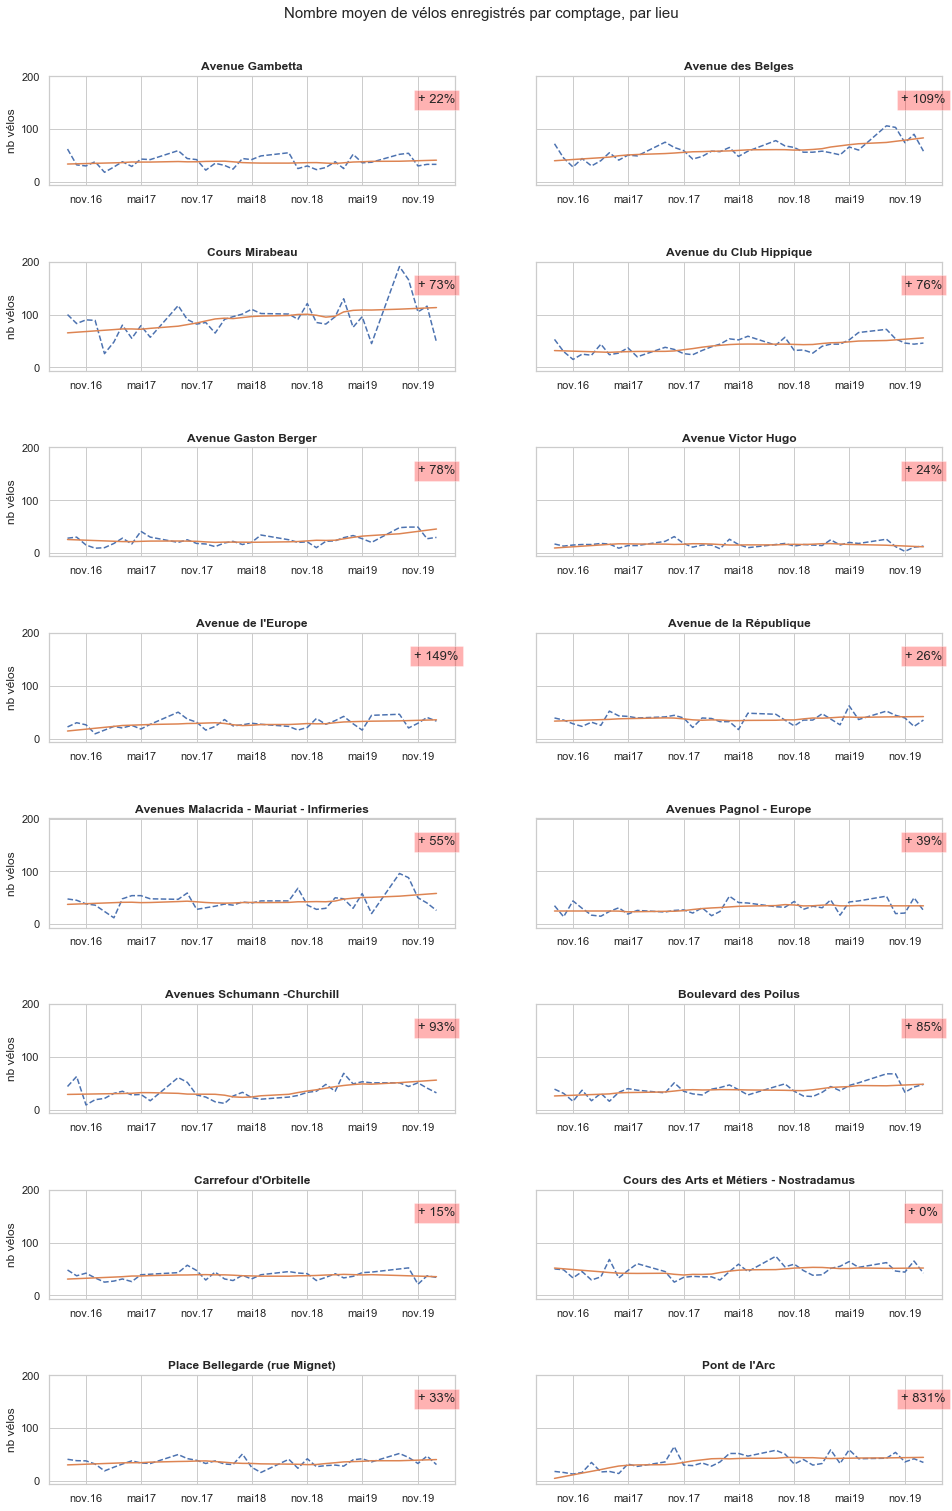

In [171]:
fig, axs = plt.subplots(8,2, sharey = True, figsize=(16, 24))
fig.subplots_adjust(hspace=0.7)
fig.subplots_adjust(top=0.94)

for nlieu in range(16):
    cote = 0 if nlieu%2==0 else 1 #graphs pairs à gauche, impairs à droite
    
    #graph des comptages sur ce lieu
    g=sns.lineplot(x=ts_by_month_lieu_imp.index, y=ts_by_month_lieu_imp.iloc[:,nlieu], ax=axs[nlieu//2,cote]) #comptages de vélos en pointillés
    g.lines[0].set_linestyle("--")

    #ligne de tendance
    sns.lineplot(x=ts_by_month_lieu_decompose.trend.index, y=ts_by_month_lieu_decompose.trend.iloc[:,nlieu], ax=axs[nlieu//2,cote]) #tendance en rouge
    
    #titre et axes
    g.set_title(ts_by_month_lieu_imp.columns[nlieu], weight='bold')
    g.set(xlabel='', ylabel='nb vélos')
    g.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    g.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))

    #ajouter le % de croissance sur ce lieu
    g.text(trend_date_der,150,'+ '+list_perc_croissance[nlieu]+"%", fontsize=13,horizontalalignment='center', bbox=dict(facecolor='red',alpha=0.3))

fig.suptitle('Nombre moyen de vélos enregistrés par comptage, par lieu', fontsize=15)

#### Sélection des 4 lieux pour la prez de l'ADAVA

Text(0.5, 0.98, 'Nombre moyen de vélos enregistrés à chaque comptage (pendant 1h) par lieu')

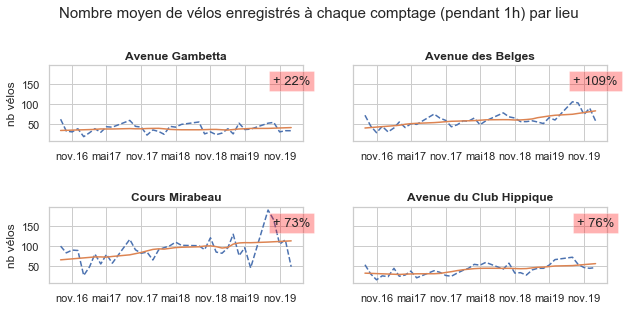

In [209]:
fig, axs = plt.subplots(2,2, sharey = True, figsize=(10,4.5))
fig.subplots_adjust(hspace=0.85)
fig.subplots_adjust(top=0.8)

for nlieu in range(4):
    cote = 0 if nlieu%2==0 else 1 #graphs pairs à gauche, impairs à droite
    
    #graph des comptages sur ce lieu
    g=sns.lineplot(x=ts_by_month_lieu_imp.index, y=ts_by_month_lieu_imp.iloc[:,nlieu], ax=axs[nlieu//2,cote]) #comptages de vélos en pointillés
    g.lines[0].set_linestyle("--")

    #ligne de tendance
    sns.lineplot(x=ts_by_month_lieu_decompose.trend.index, y=ts_by_month_lieu_decompose.trend.iloc[:,nlieu], ax=axs[nlieu//2,cote]) #tendance en rouge
    
    #titre et axes
    g.set_title(ts_by_month_lieu_imp.columns[nlieu], weight='bold')
    g.set(xlabel='', ylabel='nb vélos')
    g.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    g.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))

    #ajouter le % de croissance sur ce lieu
    g.text(trend_date_der,150,'+ '+list_perc_croissance[nlieu]+"%", fontsize=13,horizontalalignment='center', bbox=dict(facecolor='red',alpha=0.3))

fig.suptitle('Nombre moyen de vélos enregistrés à chaque comptage (pendant 1h) par lieu', fontsize=15)

les autres lieux :

Text(0.5, 0.98, 'Nombre moyen de vélos enregistrés à chaque comptage (pendant 1h) par lieu')

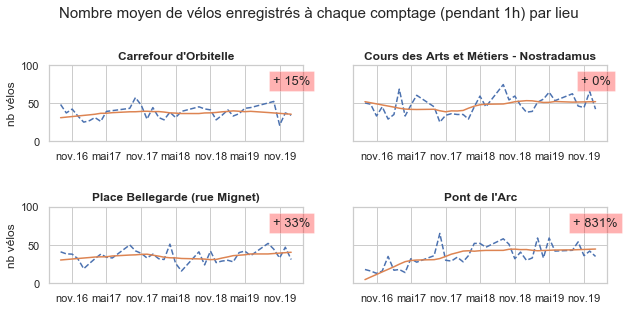

In [213]:
fig, axs = plt.subplots(2,2, sharey = True, figsize=(10,4.5))
fig.subplots_adjust(hspace=0.85)
fig.subplots_adjust(top=0.8)

for nlieu in range(12,16):
    cote = 0 if nlieu%2==0 else 1 #graphs pairs à gauche, impairs à droite
    
    #graph des comptages sur ce lieu
    g=sns.lineplot(x=ts_by_month_lieu_imp.index, y=ts_by_month_lieu_imp.iloc[:,nlieu], ax=axs[(nlieu-12)//2,cote]) #comptages de vélos en pointillés
    g.lines[0].set_linestyle("--")

    #ligne de tendance
    sns.lineplot(x=ts_by_month_lieu_decompose.trend.index, y=ts_by_month_lieu_decompose.trend.iloc[:,nlieu], ax=axs[(nlieu-12)//2,cote]) #tendance en rouge
    
    #titre et axes
    g.set_title(ts_by_month_lieu_imp.columns[nlieu], weight='bold')
    g.set(xlabel='', ylabel='nb vélos')
    g.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    g.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))
    
    plt.ylim(0, 100)

    #ajouter le % de croissance sur ce lieu
    g.text(trend_date_der,75,'+ '+list_perc_croissance[nlieu]+"%", fontsize=13,horizontalalignment='center', bbox=dict(facecolor='red',alpha=0.3))

fig.suptitle('Nombre moyen de vélos enregistrés à chaque comptage (pendant 1h) par lieu', fontsize=15)

# 3 - Graphs comptages automatiques

In [46]:
data_auto_1h.head()

,Av.Schuman,Av.Europe,Av.Belges-dir.Gare,Av.Belges-dir.Rotonde
date,,,,
2019-09-18 02:00:00,NaN,NaN,NaN,2.0
2019-09-18 11:00:00,NaN,NaN,NaN,0.0
2019-09-18 12:00:00,NaN,NaN,NaN,2.0
2019-09-18 13:00:00,NaN,NaN,NaN,29.0
2019-09-18 14:00:00,NaN,NaN,NaN,20.0


## 3-1- Nombre de vélos par jour

In [47]:
#agrégation par jour
data_auto_j = data_auto_1h.groupby(data_auto_1h.index.date).sum()

#supprimer les 2 premiers jours (installation) et le dernier (incomplet)
data_auto_j = data_auto_j.drop(data_auto_j.index[[0,1,-1]])

(0, 335.0)

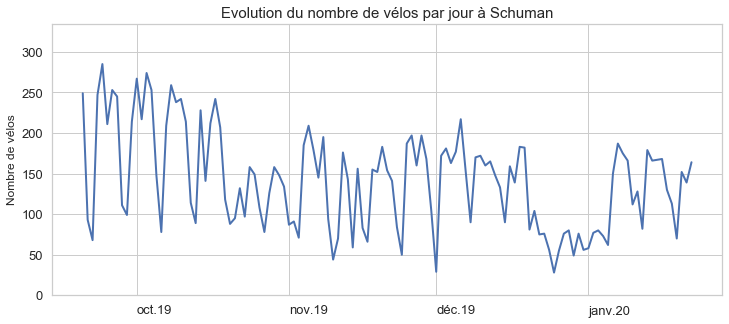

In [48]:
plt.figure(figsize=(12,5))
g_by_lieu = sns.lineplot(x=data_auto_j.index, y='Av.Schuman', data=data_auto_j, linewidth=2)

g_by_lieu.set(ylabel='Nombre de vélos')
plt.xticks(fontsize=13),plt.yticks(fontsize=13)
g_by_lieu.axes.set_title('Evolution du nombre de vélos par jour à Schuman',fontsize=15)

g_by_lieu.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
g_by_lieu.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))

for label in g_by_lieu.get_xticklabels():
    label.set_horizontalalignment('left')

plt.ylim(0, data_auto_j['Av.Schuman'].max()+50)



(0, 550.0)

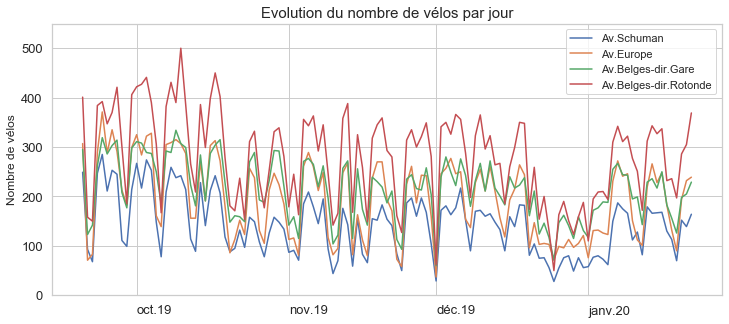

In [49]:
plt.figure(figsize=(12,5))
g_by_lieu = sns.lineplot(data=data_auto_j,dashes=False)

g_by_lieu.set(ylabel='Nombre de vélos')
plt.xticks(fontsize=13),plt.yticks(fontsize=13)
g_by_lieu.axes.set_title('Evolution du nombre de vélos par jour',fontsize=15)

g_by_lieu.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
g_by_lieu.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))

for label in g_by_lieu.get_xticklabels():
    label.set_horizontalalignment('left')

plt.ylim(0, data_auto_j.max().max()+50)


## 3-2- Nombre de vélos par semaine

In [50]:
#agrégation par semaine
data_auto_s = data_auto_1h.resample('W-Mon',label='left',closed='left').sum()

#supprimer la 1e et la dernière semaine (incomplètes)
data_auto_s = data_auto_s.drop(data_auto_s.index[[0,-1]])

(0, 2963.0)

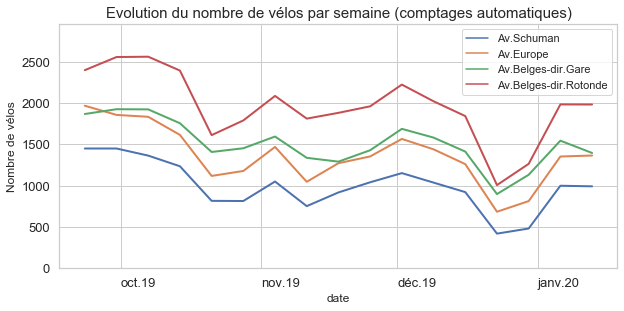

In [228]:
plt.figure(figsize=(10,4.5))
g_by_lieu_s = sns.lineplot(data=data_auto_s, linewidth=2,dashes=False)

g_by_lieu_s.set(ylabel='Nombre de vélos')
plt.xticks(fontsize=13),plt.yticks(fontsize=13)
g_by_lieu_s.axes.set_title('Evolution du nombre de vélos par semaine (comptages automatiques)',fontsize=15)

g_by_lieu_s.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
g_by_lieu_s.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))

for label in g_by_lieu_s.get_xticklabels():
    label.set_horizontalalignment('left')
    
plt.ylim(0, data_auto_s.max().max()+400)



#### Nombre total par semaine

In [52]:
data_sem_tot = data_auto_s.sum(axis=1)

(0, 8795.0)

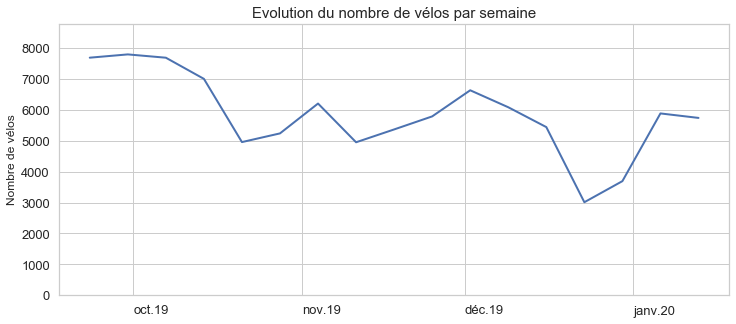

In [53]:
plt.figure(figsize=(12,5))
g_by_lieu_s = sns.lineplot(data=data_sem_tot, linewidth=2)

g_by_lieu_s.set(ylabel='Nombre de vélos')
plt.xticks(fontsize=13),plt.yticks(fontsize=13)
g_by_lieu_s.axes.set_title('Evolution du nombre de vélos par semaine',fontsize=15)

g_by_lieu_s.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
g_by_lieu_s.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))

for label in g_by_lieu_s.get_xticklabels():
    label.set_horizontalalignment('left')

plt.ylim(0, data_sem_tot.max()+1000)

(0, 8795.0)

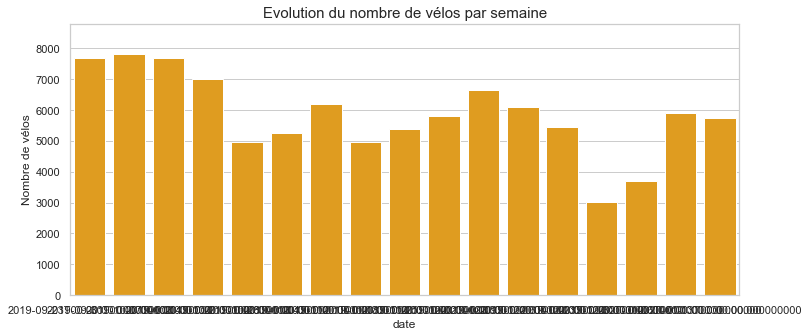

In [54]:
plt.figure(figsize=(12,5))
g_by_lieu_s = sns.barplot(x=data_auto_s.index,y=data_sem_tot.values,color='orange')


g_by_lieu_s.set(ylabel='Nombre de vélos')
g_by_lieu_s.axes.set_title('Evolution du nombre de vélos par semaine',fontsize=15)



plt.ylim(0, data_sem_tot.max()+1000)

# 4 - Comparaison des données de l'ADAVA et de la mairie aux mêmes points

#### Dates et horaires des comptages de l'ADAVA de septembre 2019 à janvier 2020

In [55]:
dates_comptages_europe = pd.to_datetime([datetime(2019, 9, 17, 17, 30),datetime(2019, 9, 17, 17, 45),datetime(2019, 9, 17, 18, 0),
                          datetime(2019, 10, 15, 17, 15),datetime(2019, 10, 15, 17, 30),datetime(2019, 10, 15, 17, 45),datetime(2019, 10, 15, 18,0),
                          datetime(2019, 11, 19, 17, 15),datetime(2019, 11, 19, 17, 30),datetime(2019, 11, 19, 17, 45),datetime(2019, 11, 19, 18,0),
                          datetime(2019, 12, 17, 17, 15),datetime(2019, 12, 17, 17, 30),datetime(2019, 12, 17, 17, 45),datetime(2019, 12, 17, 18,0),
                          datetime(2020, 1, 21, 17, 15),datetime(2020, 1, 21, 17, 30),datetime(2020, 1, 21, 17, 45),datetime(2020, 1, 21, 18, 0)])
#janvier europe début à 17h50

dates_comptages_belges = pd.to_datetime([datetime(2019, 9, 26, 17, 0),datetime(2019, 9, 26, 17, 15),datetime(2019, 9, 26, 17, 30),datetime(2019, 9, 26, 17, 45),
                          datetime(2019, 10, 17, 17,0),datetime(2019, 10, 17, 17, 15),datetime(2019, 10, 17, 17, 30),datetime(2019, 10, 17, 17, 45),
                          datetime(2019, 11, 12, 17,0),datetime(2019, 11, 12, 17, 15),datetime(2019, 11, 12, 17, 30),datetime(2019, 11, 12, 17, 45),
                          datetime(2019, 12, 10, 17,0),datetime(2019, 12, 10, 17, 15),datetime(2019, 12, 10, 17, 30),datetime(2019, 12, 10, 17, 45),
                          datetime(2020, 1, 14, 17,0),datetime(2020, 1, 14, 17, 15),datetime(2020, 1, 14, 17, 30),datetime(2020, 1, 14, 17, 45)])

dates_comptages_schuman = pd.to_datetime([datetime(2019, 9, 12, 17, 0),datetime(2019, 9, 12, 17, 15),datetime(2019, 9, 12, 17, 30),datetime(2019, 9, 12, 17, 45),
                          datetime(2019, 10, 17, 17,0),datetime(2019, 10, 17, 17, 15),datetime(2019, 10, 17, 17, 30),datetime(2019, 10, 17, 17, 45),
                          datetime(2019, 11, 12, 17,0),datetime(2019, 11, 12, 17, 15),datetime(2019, 11, 12, 17, 30),
                          datetime(2019, 12, 19, 17,0),datetime(2019, 12, 19, 17, 15),datetime(2019, 12, 19, 17, 30),datetime(2019, 12, 19, 17, 45),
                          datetime(2020, 1, 14, 17,0),datetime(2020, 1, 14, 17, 15),datetime(2020, 1, 14, 17, 30),datetime(2020, 1, 14, 17, 45)])
#novembre schuman début à 16h55

#### Sélectionner parmi les données de la mairie les comptages cumulés sur ces horaires

In [56]:
data_auto_1h.columns

Index(['Av.Schuman', 'Av.Europe', 'Av.Belges-dir.Gare',
       'Av.Belges-dir.Rotonde'],
      dtype='object')

In [57]:
data_schuman_auto = data_auto_15mn['Av.Schuman'].iloc[np.isin(data_auto_15mn.index,dates_comptages_schuman)]
data_europe_auto = data_auto_15mn['Av.Europe'].iloc[np.isin(data_auto_15mn.index,dates_comptages_europe)]
data_belgesdgare_auto = data_auto_15mn['Av.Belges-dir.Gare'].iloc[np.isin(data_auto_15mn.index,dates_comptages_belges)]
data_belgesdrotonde_auto = data_auto_15mn['Av.Belges-dir.Rotonde'].iloc[np.isin(data_auto_15mn.index,dates_comptages_belges)]

In [58]:
#changer le jour de comptage dans la date par "1" (pour faciliter la comparaison avec les données ADAVA)
data_schuman_auto.index = data_schuman_auto.index.map(lambda x : x.replace(day=1))
data_europe_auto.index = data_europe_auto.index.map(lambda x : x.replace(day=1))
data_belgesdgare_auto.index = data_belgesdgare_auto.index.map(lambda x : x.replace(day=1))
data_belgesdrotonde_auto.index = data_belgesdrotonde_auto.index.map(lambda x : x.replace(day=1))

In [59]:
#data_schuman_auto.groupby(pd.Grouper(freq="M")).sum()
#data_schuman_auto.resample("M").sum()

#data_schuman_auto = data_schuman_auto.groupby(data_schuman_auto.index.to_period("M")).sum()
#data_europe_auto = data_europe_auto.groupby(data_europe_auto.index.to_period("M")).sum()
#data_belgesdgare_auto = data_belgesdgare_auto.groupby(data_belgesdgare_auto.index.to_period("M")).sum()
#data_belgesdrotonde_auto = data_belgesdrotonde_auto.groupby(data_belgesdrotonde_auto.index.to_period("M")).sum()

In [60]:
#sommer les comptages des différents 1/4h du même jour
data_schuman_auto = data_schuman_auto.groupby(data_schuman_auto.index.date).sum()
data_europe_auto = data_europe_auto.groupby(data_europe_auto.index.date).sum()
data_belgesdgare_auto = data_belgesdgare_auto.groupby(data_belgesdgare_auto.index.date).sum()
data_belgesdrotonde_auto = data_belgesdrotonde_auto.groupby(data_belgesdrotonde_auto.index.date).sum()

In [61]:
data_auto_comp = pd.concat([data_schuman_auto, data_europe_auto,data_belgesdgare_auto,data_belgesdrotonde_auto], axis=1,sort=True)
data_auto_comp.index.name = 'date'
data_auto_comp = data_auto_comp.reset_index().melt(id_vars='date').dropna()

In [62]:
#construire une df : mois, lieu, nb_auto
data_auto_comp = pd.concat([data_schuman_auto, data_europe_auto,data_belgesdgare_auto,data_belgesdrotonde_auto], axis=1, sort=True)
data_auto_comp.index.name = 'date'
data_auto_comp = data_auto_comp.reset_index().melt(id_vars='date').dropna()
data_auto_comp = data_auto_comp.rename(columns = {'variable':'lieu','value':'nb_auto'})
data_auto_comp['nb_auto'] = data_auto_comp['nb_auto'].astype(int)
#data_auto_comp.set_index('date',inplace=True)

In [63]:
data_auto_comp['date'] = data_auto_comp['date'].values.astype('datetime64[ns]') 

#### Extraire les données de comptages ADAVA à comparer

In [64]:
liste_lieux[[3,5,9]]

Index(['Avenue de l'Europe', 'Avenue des Belges',
       'Avenues Schumann -Churchill'],
      dtype='object', name='lieu')

In [65]:
liste_dates = pd.to_datetime([datetime(2019, 9, 1,0,0,0),datetime(2019, 10, 1,0,0,0),datetime(2019, 11, 1,0,0,0),datetime(2019, 12, 1,0,0,0),datetime(2020, 1, 1,0,0,0)])

In [66]:
#on ne garde que les 3 rues avec comptages automatiques et les dates depuis septembre
data_adava_comp = data_adava.iloc[np.isin(data_adava.lieu,liste_lieux[[3,5,9]]) & np.isin(data_adava.date,liste_dates)]

In [67]:
#on cumule les vélos et VAE
data_adava_comp = data_adava_comp.groupby(['date','lieu','dir_voie'],as_index=False).sum()

In [68]:
#sélectionner les données avec la même direction et voie que les comptages automatiques :
#Avenue des Belges : 'Venant du Centre-Ville : Cyclistes sur le trottoir' & 'Vers le Centre-Ville : Cyclistes sur le trottoir'
#Avenue Schuman : 'Avenue Robert Schumann : Cyclistes allant au Centre-Ville'
#Avenue de l'Europe : 'Venant de la Rotonde : Cyclistes sur le trottoir'

data_lieux_compt_auto = np.where(((data_adava_comp['lieu']=='Avenue des Belges') & (data_adava_comp['dir_voie']=='Vers le Centre-Ville : Cyclistes sur le trottoir'))
                                 | ((data_adava_comp['lieu']=='Avenue des Belges') & (data_adava_comp['dir_voie']=='Venant du Centre-Ville : Cyclistes sur le trottoir'))
                                 | ((data_adava_comp['lieu']=='Avenues Schumann -Churchill') & (data_adava_comp['dir_voie']=='Avenue Robert Schumann : Cyclistes allant au Centre-Ville'))
                                 | ((data_adava_comp['lieu']=='Avenue de l\'Europe') & (data_adava_comp['dir_voie']=='Venant de la Rotonde : Cyclistes sur le trottoir')))

data_adava_comp = data_adava_comp.iloc[data_lieux_compt_auto[0]]

In [69]:
#renommer : 'Av.Schuman', 'Av.Europe', 'Av.Belges-dir.Gare', 'Av.Belges-dir.Rotonde'
        
for i in range(len(data_adava_comp)):
    if data_adava_comp['lieu'].iloc[i] == 'Avenue de l\'Europe':
        data_adava_comp['lieu'].iloc[i] = 'Av.Europe'
    elif data_adava_comp['lieu'].iloc[i] == 'Avenues Schumann -Churchill':
        data_adava_comp['lieu'].iloc[i] = 'Av.Schuman'
    elif (data_adava_comp['lieu'].iloc[i] == 'Avenue des Belges')&(data_adava_comp['dir_voie'].iloc[i]=='Venant du Centre-Ville : Cyclistes sur le trottoir'):
        data_adava_comp['lieu'].iloc[i] = 'Av.Belges-dir.Gare' 
    elif (data_adava_comp['lieu'].iloc[i] == 'Avenue des Belges')&(data_adava_comp['dir_voie'].iloc[i]=='Vers le Centre-Ville : Cyclistes sur le trottoir'):
        data_adava_comp['lieu'].iloc[i] = 'Av.Belges-dir.Rotonde' 

In [70]:
#on supprime la colonne 'dir_voie'
data_adava_comp1 = data_adava_comp.drop('dir_voie',1)

#on met la date en index au format yyyy-mm
#data_adava_comp2 = data_adava_comp1.set_index('date')
#data_adava_comp2.index = data_adava_comp2.index.to_period("M")
#data_adava_comp2.reset_index(level='date',inplace=True)

#on change 'nombre' en 'nb_adava'
data_adava_comp1.rename(columns = {'nombre':'nb_adava'},inplace=True)


#### Comparer les données ADAVA et mairie

In [71]:
data_comparaison = pd.merge(data_auto_comp,data_adava_comp1,on=['date','lieu'])
#data_comparaison.set_index('date',inplace=True)

In [72]:
data_comparaison

,date,lieu,nb_auto,nb_adava
0,2019-10-01,Av.Schuman,28,26
1,2019-11-01,Av.Schuman,14,24
2,2019-12-01,Av.Schuman,14,31
3,2020-01-01,Av.Schuman,12,30
4,2019-10-01,Av.Europe,22,13
5,2019-11-01,Av.Europe,27,16
6,2019-12-01,Av.Europe,21,20
7,2020-01-01,Av.Europe,19,12
8,2019-09-01,Av.Belges-dir.Gare,19,19
9,2019-10-01,Av.Belges-dir.Gare,25,26


In [73]:
data_comp2 = data_comparaison.melt(id_vars=['date','lieu'], var_name='comptage', value_name='nombre')#.set_index('date')

In [74]:
'''
plt.figure(figsize=(12,5))
g_comp = sns.lineplot(x='date',y='nombre',data=data_comp2,hue='comptage', linewidth=2,dashes=False)


g_comp.set(ylabel='Nombre de vélos')
g_comp.axes.set_title('Comparaison données ADAVA et Mairie',fontsize=15)

g_comp.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
g_comp.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))

for label in g_comp.get_xticklabels():
    label.set_horizontalalignment('left')
    
plt.ylim(0, data_comp2.max().max()+5)
'''


"\nplt.figure(figsize=(12,5))\ng_comp = sns.lineplot(x='date',y='nombre',data=data_comp2,hue='comptage', linewidth=2,dashes=False)\n\n\ng_comp.set(ylabel='Nombre de vélos')\ng_comp.axes.set_title('Comparaison données ADAVA et Mairie',fontsize=15)\n\ng_comp.xaxis.set_major_locator(mdates.MonthLocator(interval=1))\ng_comp.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))\n\nfor label in g_comp.get_xticklabels():\n    label.set_horizontalalignment('left')\n    \nplt.ylim(0, data_comp2.max().max()+5)\n"

# 5 - Analyse de la fréquentation par plage horaire et jour de la semaine

## 5-1- Moyenne journalière sur chaque jour de la semaine

In [75]:
data_auto_j.index = pd.to_datetime(data_auto_j.index)

In [76]:
data_js = data_auto_j.groupby(data_auto_j.index.weekday.rename('j_sem')).mean()
data_js.index = ['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche']

In [77]:
data_js

,Av.Schuman,Av.Europe,Av.Belges-dir.Gare,Av.Belges-dir.Rotonde
Lundi,158.333333,212.666667,227.444444,295.944444
Mardi,170.666667,243.555556,238.333333,323.111111
Mercredi,160.333333,229.444444,232.722222,311.277778
Jeudi,167.529412,230.882353,233.705882,322.411765
Vendredi,161.555556,210.000000,238.833333,306.166667
Samedi,107.333333,135.111111,189.555556,244.277778
Dimanche,71.000000,103.222222,144.055556,163.055556


(0, 373.1111111111111)

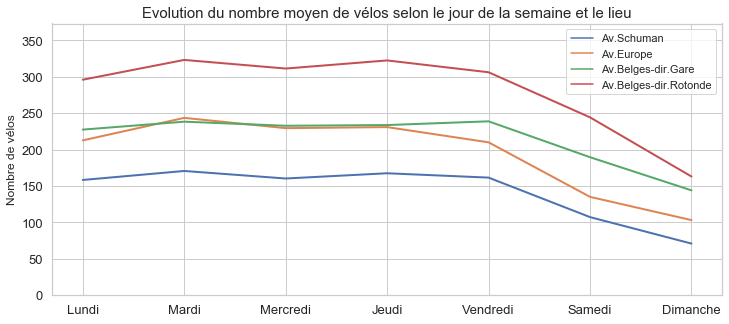

In [78]:
plt.figure(figsize=(12,5))
g_js = sns.lineplot(data=data_js, sort= False, linewidth=2,dashes=False)

g_js.set(ylabel='Nombre de vélos')
plt.xticks(fontsize=13),plt.yticks(fontsize=13)
g_js.axes.set_title('Evolution du nombre moyen de vélos selon le jour de la semaine et le lieu',fontsize=15)
    
plt.ylim(0, data_js.max().max()+50)

## 5-2- Moyenne horaire sur chaque heure du jour

In [79]:
data_h = data_auto_1h.groupby(data_auto_1h.index.hour.rename('heure')).mean()
data_h.head()

,Av.Schuman,Av.Europe,Av.Belges-dir.Gare,Av.Belges-dir.Rotonde
heure,,,,
0,0.592,0.944882,1.555556,1.952381
1,0.360,0.456693,0.714286,0.849206
2,0.128,0.228346,0.293651,0.425197
3,0.120,0.181102,0.253968,0.285714
4,0.120,0.188976,0.293651,0.523810


(0, 29.598425196850393)

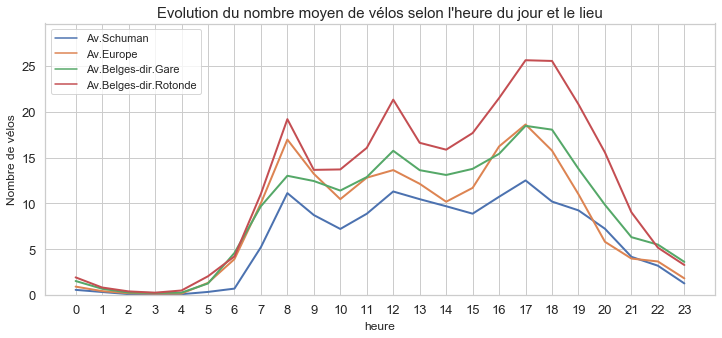

In [80]:
plt.figure(figsize=(12,5))
g_js = sns.lineplot(data=data_h, linewidth=2,dashes=False)

g_js.set(ylabel='Nombre de vélos')
plt.xticks(fontsize=13),plt.yticks(fontsize=13)
g_js.axes.set_title('Evolution du nombre moyen de vélos selon l\'heure du jour et le lieu',fontsize=15)

g_js.axes.xaxis.set_ticks(range(0,24,1))
    
plt.ylim(0, data_h.max().max()+4)

## 5-3- Moyenne horaire sur chaque heure de la semaine

In [81]:
data_auto_1h.iloc[50:55]

,Av.Schuman,Av.Europe,Av.Belges-dir.Gare,Av.Belges-dir.Rotonde
date,,,,
2019-09-20 12:00:00,15.0,31.0,23.0,31.0
2019-09-20 13:00:00,10.0,22.0,17.0,29.0
2019-09-20 14:00:00,17.0,7.0,4.0,12.0
2019-09-20 15:00:00,12.0,8.0,17.0,18.0
2019-09-20 16:00:00,24.0,22.0,15.0,36.0


In [82]:
data_h_js = data_auto_1h.groupby([data_auto_1h.index.weekday.rename('j_sem'),data_auto_1h.index.hour.rename('heure')]).mean()
#data_h_js = data_h_js.reset_index()
round(data_h_js,2).head(10)

Av.Schuman  Av.Europe  Av.Belges-dir.Gare  Av.Belges-dir.Rotonde
j_sem heure                                                                  
0     0            0.44       0.61                0.89                   1.00
      1            0.11       0.06                0.44                   0.39
      2            0.00       0.17                0.11                   0.28
      3            0.11       0.06                0.00                   0.11
      4            0.00       0.33                0.33                   0.50
      5            0.67       1.67                1.83                   2.94
      6            0.78       4.33                5.72                   4.61
      7            6.44      13.17               11.83                  15.44
      8           13.83      19.94               15.56                  21.83
      9            9.78      15.39               13.00                  15.00

In [83]:
#plt.figure(figsize=(12,5))
#g_h_js = sns.lineplot(x=data_h_js.index,y='Av.Schuman',data=data_h_js, linewidth=2)


#g_h_js.set(ylabel='Nombre de vélos')
#g_h_js.axes.set_title('Evolution du nombre de vélos par semaine',fontsize=15)

#g_h_js.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#g_h_js.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))

#plt.ylim(0, data_h_js.max()+10)

## 5-4- Redresser les données ADAVA et déterminer la journée type moyenne

# 6 - Analyse des variations saisonnières

## 6-1- Variations saisonnières sur les jours ouvrables

In [84]:
#ajout du jour de la semaine sur la df
data_auto_j2 = data_auto_j[:]
data_auto_j2.insert(0, 'j_sem',data_auto_j2.index.weekday) 

In [85]:
jours_conges = pd.to_datetime([datetime(2019, 11, 1),datetime(2019, 11, 11),datetime(2019, 12, 25),datetime(2020, 1, 1)])#, #jours fériés
               #               datetime(2019, 10, 21),datetime(2019, 10, 22),datetime(2019, 10, 23),datetime(2019, 10, 24),datetime(2019, 10, 25),datetime(2019, 10, 28),datetime(2019, 10, 29),datetime(2019, 10, 30),datetime(2019, 10, 31), #vacances toussaint
                #               datetime(2019, 12, 23),datetime(2019, 12, 24),datetime(2019, 12, 26),datetime(2019, 12, 27),datetime(2019, 12, 30),datetime(2019, 12, 31),datetime(2020, 1, 2),datetime(2020, 1, 3)]) #vacances de Noël
        

In [86]:
#sélection uniquement des jours ouvrables -> on enlève samedis (5), dimanches (6) et jours fériés
data_auto_jouvr = data_auto_j2.iloc[~np.isin(data_auto_j2['j_sem'],[5,6])]
data_auto_jouvr = data_auto_jouvr.iloc[~np.isin(data_auto_jouvr.index,jours_conges)]

#on ne garde pas la variable j_sem
data_auto_jouvr = data_auto_jouvr.drop('j_sem',axis=1)

In [87]:
#agrégation par semaine
data_auto_js_ouvr = data_auto_jouvr.resample('W-Mon',label='left',closed='left').mean()

#supprimer la 1e et la dernière semaine (incomplètes)
#data_auto_js_ouvr = data_auto_js_ouvr.drop(data_auto_s.index[[0,-1]])

(0, 617.6)

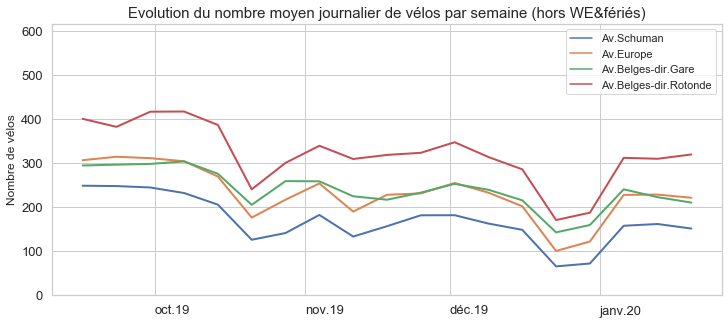

In [88]:
plt.figure(figsize=(12,5))
g_by_lieu_js = sns.lineplot(data=data_auto_js_ouvr, linewidth=2,dashes=False)

g_by_lieu_js.set(ylabel='Nombre de vélos')
plt.xticks(fontsize=13),plt.yticks(fontsize=13)
g_by_lieu_js.axes.set_title('Evolution du nombre moyen journalier de vélos par semaine (hors WE&fériés)',fontsize=15)

g_by_lieu_js.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
g_by_lieu_js.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))

for label in g_by_lieu_js.get_xticklabels():
    label.set_horizontalalignment('left')
    
plt.ylim(0, data_auto_js_ouvr.max().max()+200)



In [89]:
#agrégation par mois
data_auto_jm_ouvr = data_auto_jouvr.resample('M').mean()
data_auto_jm_ouvr.index = data_auto_jm_ouvr.index.map(lambda x : x.replace(day=1))

(0, 588.7142857142858)

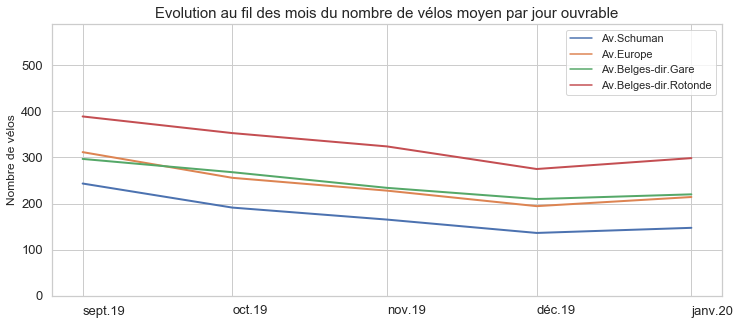

In [90]:
plt.figure(figsize=(12,5))
g_by_lieu_jm = sns.lineplot(data=data_auto_jm_ouvr, linewidth=2,dashes=False)

g_by_lieu_jm.set(ylabel='Nombre de vélos')
plt.xticks(fontsize=13),plt.yticks(fontsize=13)
g_by_lieu_jm.axes.set_title('Evolution au fil des mois du nombre de vélos moyen par jour ouvrable',fontsize=15)

g_by_lieu_jm.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
g_by_lieu_jm.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))

for label in g_by_lieu_jm.get_xticklabels():
    label.set_horizontalalignment('left')
    
plt.ylim(0, data_auto_jm_ouvr.max().max()+200)



## 6-2- Variations saisonnières tous jours confondus

In [101]:
#agrégation par semaine
data_auto_js_0 = data_auto_j.resample('W-Mon',label='left',closed='left').mean()

In [102]:
#enlever les 1e et dernière semaines incomplètes
data_auto_js = data_auto_js_0.iloc[1:-1]

(0, 617.6)

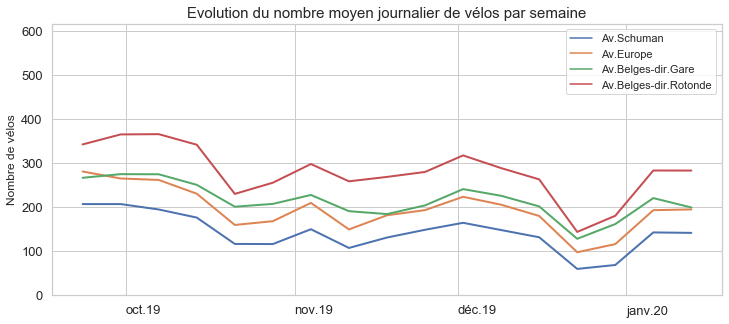

In [103]:
plt.figure(figsize=(12,5))
g_by_lieu_js = sns.lineplot(data=data_auto_js, linewidth=2,dashes=False)

g_by_lieu_js.set(ylabel='Nombre de vélos')
plt.xticks(fontsize=13),plt.yticks(fontsize=13)
g_by_lieu_js.axes.set_title('Evolution du nombre moyen journalier de vélos par semaine',fontsize=15)

g_by_lieu_js.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
g_by_lieu_js.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))

for label in g_by_lieu_js.get_xticklabels():
    label.set_horizontalalignment('left')
    
plt.ylim(0, data_auto_js_ouvr.max().max()+200)



In [93]:
#agrégation par mois
data_auto_jm = data_auto_j.resample('M').mean()
data_auto_jm.index = data_auto_jm.index.map(lambda x : x.replace(day=1))

(0, 588.7142857142858)

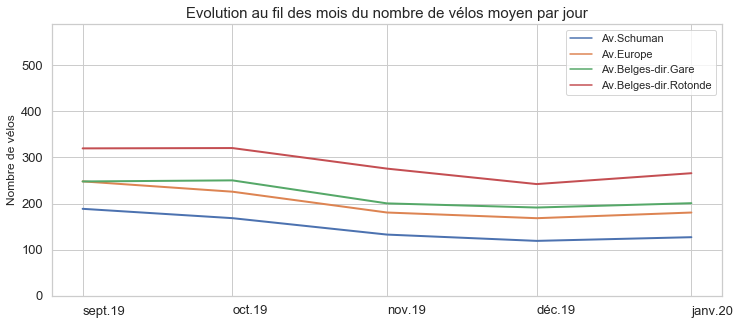

In [94]:
plt.figure(figsize=(12,5))
g_by_lieu_jm = sns.lineplot(data=data_auto_jm, linewidth=2,dashes=False)

g_by_lieu_jm.set(ylabel='Nombre de vélos')
plt.xticks(fontsize=13),plt.yticks(fontsize=13)
g_by_lieu_jm.axes.set_title('Evolution au fil des mois du nombre de vélos moyen par jour',fontsize=15)

g_by_lieu_jm.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
g_by_lieu_jm.xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))

for label in g_by_lieu_jm.get_xticklabels():
    label.set_horizontalalignment('left')
    
plt.ylim(0, data_auto_jm_ouvr.max().max()+200)



# 7 - Comparaison du traffic de 17 à 18h avec le reste de la journée

-> Comment varient le trafic de la période de comptages (17 -18 heures) et le trafic journalier total selon les jours ouvrables. Est-ce la  période la plus chargée ?

 ->calculer le rapport comptages / traffic total de ces journées

Calculer les moyennes horaires sur les 7 jours de la semaine de jours ouvrables ordinaires, puis sur quelques jours de congés scolaires (en vacances d’automne 20 octobre-3 novembre) et faire les moyennes des totaux journaliers selon le jour de la semaine.
Objectif : quelle est la part de trafic de la tranche horaire 17h/18h dans la journée pour ensuite redresser le trafic comptabilisé par l’ADAVA sur une journée (type)  moyenne ?
